In [20]:
f = open("file.txt", "w")
f.write("line1\n")
f.write("line2")
f.close() # you need the parentheses, even without arguments!

In [4]:
f = open("dog.json")
input1 = f.read()
input2 = f.read()
f.close()

type(input1)
print(input1)
print(input2)

{
    "name": "Fido",
    "age": 1
}



In [5]:
f = open("dog.json")
for line in f:
    print("LINE: " + line, end="")
f.close()

LINE: {
LINE:     "name": "Fido",
LINE:     "age": 1
LINE: }

In [11]:
# f = open("dog.json")
# lines = list(f)
# f.close()

# print("GOT", len(lines), "lines")
# print(lines)

#is equivalent to this
with open("dog.json") as f:
    lines = list(f)
# f is automatically closed after the with block

print("GOT", len(lines), "lines")
print(lines)

GOT 4 lines
['{\n', '    "name": "Fido",\n', '    "age": 1\n', '}']


In [35]:
import json

#json.load converts a file object to a dict
with open("dog.json") as f:
    dog1 = json.load(f) # fixme
    
print(type(dog1))
print(dog1)

<class 'dict'>
{'name': 'Fido', 'age': 1}


In [36]:
#json.loads converts string to dict
data = '{"name": "Fido", "age": 1}'
dog2 = json.loads(data) # fixme

print(type(dog2))
print(dog2)

<class 'dict'>
{'name': 'Fido', 'age': 1}


In [37]:
with open("dog.json") as f:
    data = f.read()
    dog = json.loads(data) # fixme
    
print(data)
print(dog)

{
    "name": "Fido",
    "age": 1
}
{'name': 'Fido', 'age': 1}


# Part 2

In [39]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from math import log2, log10, ceil
%matplotlib inline

In [40]:
matplotlib.rcParams["font.size"] = 20

def get_ax():
    fig, ax = plt.subplots(figsize=(8,6))
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlim(1, 10)
    return ax

def scale_ax():
    ax = get_ax()
    ax.set_xlabel("N (data size)")
    ax.set_ylabel("Steps")
    return ax

def plot_func(ax, f, C=1, color="k", label="work"):
    start = ax.get_xlim()[0]
    width = ax.get_xlim()[1] - ax.get_xlim()[0]
    s = pd.Series()
    for i in range(100):
        N = start + width * (i+1)/100
        s[N] = eval(f)
    s.sort_index().plot(ax=ax, color=color, linewidth=3, label=label)
    plt.text(s.index[-1], s.iloc[-1], f, verticalalignment='center')
    
def upper_bound(ax, order, C=1, minN=None):
    f = order
    if C != 1:
        f = "C * (%s)" % order
    plot_func(ax, f, C=C, color="r", label="upper bound")
    if minN != None:
        ax.axvspan(minN, ax.get_xlim()[1], color='0.85')
    ax.legend(frameon=False)

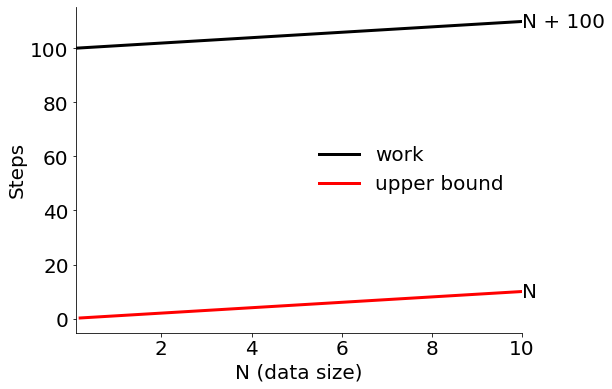

In [41]:
ax = scale_ax()
ax.set_xlim(0, 10) # TODO: change upper bound
plot_func(ax, "N + 100")

upper_bound(ax, order="N") # TODO: pass C and minN

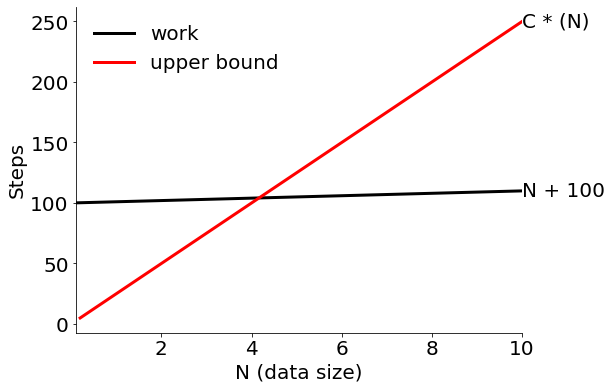

In [42]:
ax = scale_ax()
ax.set_xlim(0, 10) # TODO: change upper bound
plot_func(ax, "N + 100")

upper_bound(ax, order="N", C=25)

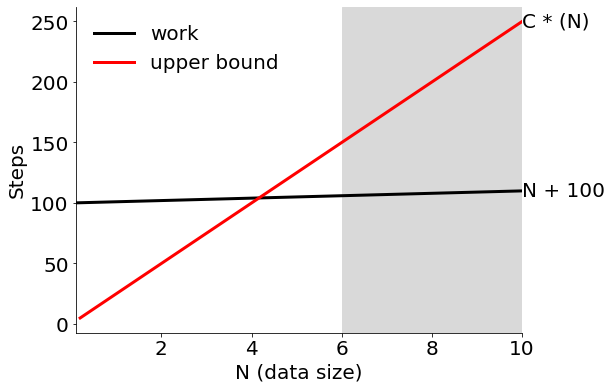

In [43]:
ax = scale_ax()
ax.set_xlim(0, 10) # TODO: change upper bound
plot_func(ax, "N + 100")

upper_bound(ax, order="N", C=25, minN=6)

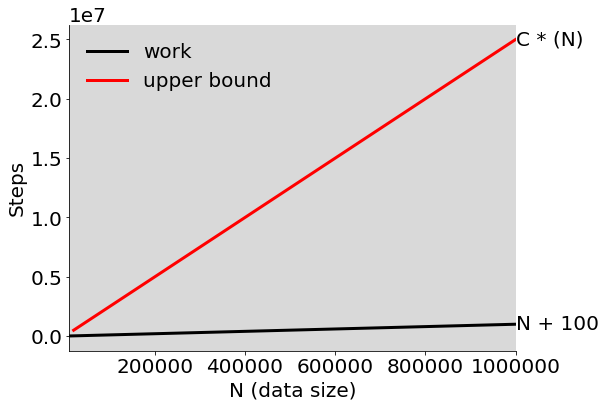

In [44]:
ax = scale_ax()
ax.set_xlim(0, 1e6)
plot_func(ax, "N + 100")

upper_bound(ax, order="N", C=25, minN=6)

Exercise 2

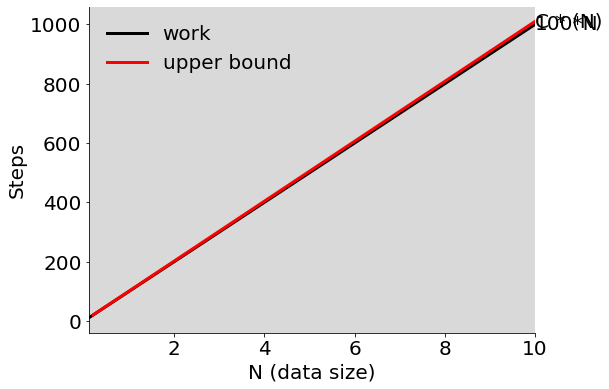

In [51]:
ax = scale_ax()
ax.set_xlim(0, 10)
plot_func(ax, "100*N")

upper_bound(ax, order="N", C=101, minN=0)

Exercise 3

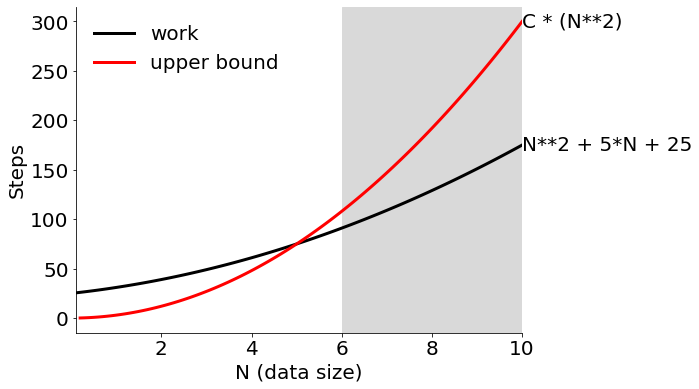

In [68]:
ax = scale_ax()
ax.set_xlim(0, 10)
plot_func(ax, "N**2 + 5*N + 25")

upper_bound(ax, order="N**2", C=3, minN=6)

Exercise 4

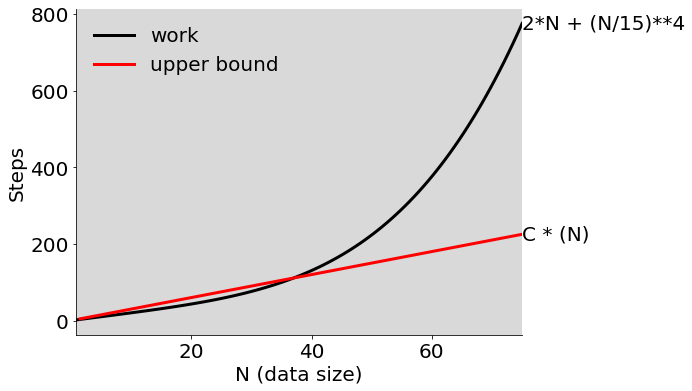

In [69]:
ax = scale_ax()
ax.set_xlim(0, 75)
plot_func(ax, "2*N + (N/15)**4")

upper_bound(ax, order="N", C=3, minN=1)
#This actually has N**2 growth

Exercise 5

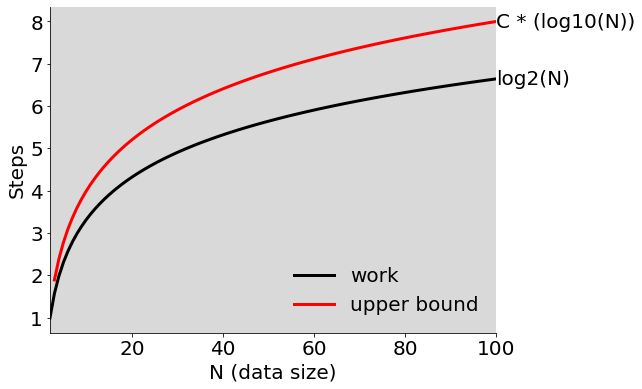

In [79]:
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "log2(N)")

upper_bound(ax, order="log10(N)", C=4, minN=0)

Exercise 6

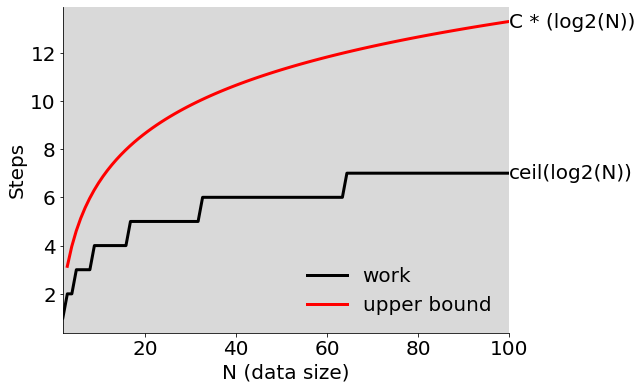

In [86]:
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "ceil(log2(N))")

upper_bound(ax, order="log2(N)", C=2, minN=0)

Exercise 7

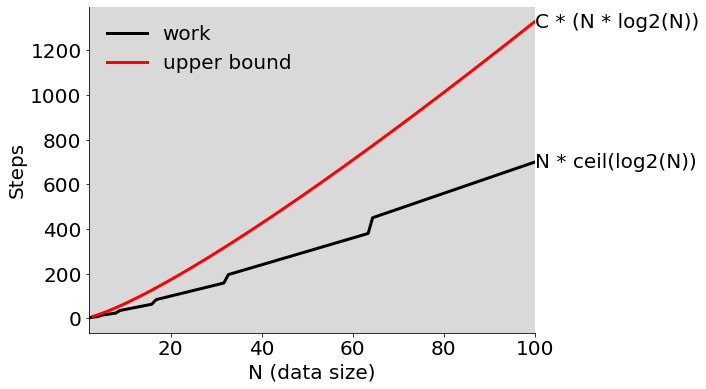

In [90]:
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "N * ceil(log2(N))")

upper_bound(ax, order="N * log2(N)", C=2, minN=0)

Exercise 8

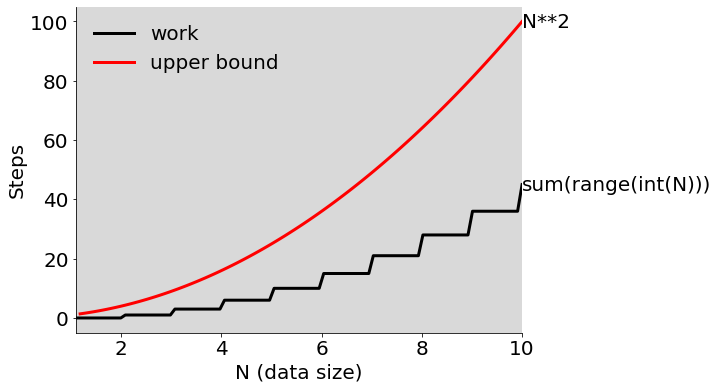

In [94]:
ax = scale_ax()
ax.set_xlim(1, 10)
plot_func(ax, "sum(range(int(N)))")

upper_bound(ax, order="N**2", minN=0)

# Part 3

In [107]:
def merge(L1, L2):
    global steps
    rv = []
    idx1 = 0
    idx2 = 0

    while True:
        steps += 1
        done1 = idx1 == len(L1)
        done2 = idx2 == len(L2)

        if done1 and done2:
            return rv

        choose1 = False
        if done2:
            choose1 = True
        elif not done1 and L1[idx1] < L2[idx2]:
            choose1 = True

        if choose1:
            rv.append(L1[idx1])
            idx1 += 1
        else:
            rv.append(L2[idx2])
            idx2 += 1
        #print("MERGE", rv, " <= ", L1[idx1:], L2[idx2:])

    return rv

In [108]:
merge([2, 4, 7, 8], [1, 3, 5, 6])

[1, 2, 3, 4, 5, 6, 7, 8]

In [109]:
def merge_sort(L):
    if len(L) < 2:
        return L
    mid = len(L) // 2
    left = L[:mid]
    right = L[mid:]
    left = merge_sort(left)
    right = merge_sort(right)
    rv = merge(left, right)
    #print("MERGESORT", left, right, " => ", rv)
    return rv

In [110]:
merge_sort([7, 2, 4, 8, 3, 5, 1, 6])

[1, 2, 3, 4, 5, 6, 7, 8]

Text(0, 0.5, 'Steps')

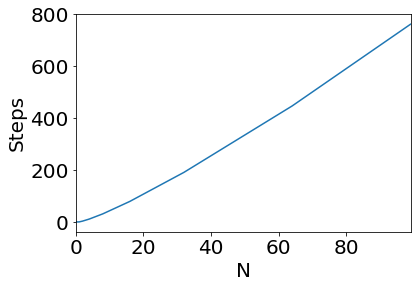

In [111]:
work_curve = pd.Series() # N => steps

L = []
for N in range(100):    
    steps = 0 # reset steps

    merge_sort(L)
    work_curve.loc[N] = steps

    L.append(N)
    
ax = work_curve.plot.line()
ax.set_xlabel("N")
ax.set_ylabel("Steps")